In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('Co2_Nettoye.csv')

In [4]:
# Variables quantitatives pour l'ACP
quant_vars = ['Engine_Size_L', 'Cylinders', 'Fuel_City_L100km', 
              'Fuel_Hwy_L100km', 'Fuel_Comb_L100km', 
              'Fuel_Comb_mpg', 'CO2_Emissions_gkm']

In [16]:
X = data[quant_vars].dropna()

In [17]:
print(f"\nNombre de variables : {len(quant_vars)}")
print(f"Nombre d'individus : {data.shape[0]}")
print(f"Variables analysées : {quant_vars}")


Nombre de variables : 7
Nombre d'individus : 6282
Variables analysées : ['Engine_Size_L', 'Cylinders', 'Fuel_City_L100km', 'Fuel_Hwy_L100km', 'Fuel_Comb_L100km', 'Fuel_Comb_mpg', 'CO2_Emissions_gkm']


# ÉTAPE 1 : CENTRAGE ET RÉDUCTION DES DONNÉES

In [18]:
print("\n" + "="*70)
print("ÉTAPE 1 : CENTRAGE ET RÉDUCTION")
print("="*70)

print("\n--- Statistiques avant centrage-réduction ---")
print(X.describe().loc[['mean', 'std']].round(3))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=quant_vars)

print("\n--- Statistiques après centrage-réduction ---")
print("Toutes les moyennes = 0, tous les écarts-types = 1")
print(X_scaled_df.describe().loc[['mean', 'std']].round(3))

print("\nFormule du centrage-réduction : X_cr = (X - moyenne) / écart-type")
print("→ Permet de comparer des variables d'unités différentes")
print("→ Chaque variable a maintenant la même importance")


ÉTAPE 1 : CENTRAGE ET RÉDUCTION

--- Statistiques avant centrage-réduction ---
      Engine_Size_L  Cylinders  Fuel_City_L100km  Fuel_Hwy_L100km  \
mean          3.162      5.619            12.610            9.071   
std           1.365      1.846             3.553            2.279   

      Fuel_Comb_L100km  Fuel_Comb_mpg  CO2_Emissions_gkm  
mean            11.018         27.411            251.158  
std              2.947          7.245             59.290  

--- Statistiques après centrage-réduction ---
Toutes les moyennes = 0, tous les écarts-types = 1
      Engine_Size_L  Cylinders  Fuel_City_L100km  Fuel_Hwy_L100km  \
mean            0.0        0.0               0.0              0.0   
std             1.0        1.0               1.0              1.0   

      Fuel_Comb_L100km  Fuel_Comb_mpg  CO2_Emissions_gkm  
mean               0.0           -0.0                0.0  
std                1.0            1.0                1.0  

Formule du centrage-réduction : X_cr = (X - moyenne

# ÉTAPE 2 : CALCUL DE L'ACP

In [19]:
print("\n" + "="*70)
print("ÉTAPE 2 : CALCUL DES COMPOSANTES PRINCIPALES")
print("="*70)

n_components = min(len(quant_vars), len(X) - 1)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print(f"\nNombre maximum de composantes : {n_components}")
print("L'ACP recherche les axes d'inertie maximale")

# Valeurs propres et % d'inertie
eigenvalues = pca.explained_variance_
inertia_pct = pca.explained_variance_ratio_ * 100
inertia_cumsum = np.cumsum(inertia_pct)

print("\n--- Valeurs propres (λ) et inertie ---")
inertia_df = pd.DataFrame({
    'Composante': [f'F{i+1}' for i in range(len(eigenvalues))],
    'Valeur propre (λ)': eigenvalues,
    'Inertie (%)': inertia_pct,
    'Inertie cumulée (%)': inertia_cumsum
})
print(inertia_df.round(3).to_string(index=False))



ÉTAPE 2 : CALCUL DES COMPOSANTES PRINCIPALES

Nombre maximum de composantes : 7
L'ACP recherche les axes d'inertie maximale

--- Valeurs propres (λ) et inertie ---
Composante  Valeur propre (λ)  Inertie (%)  Inertie cumulée (%)
        F1              6.187       88.366               88.366
        F2              0.498        7.119               95.485
        F3              0.137        1.951               97.435
        F4              0.076        1.080               98.515
        F5              0.068        0.974               99.489
        F6              0.036        0.509               99.998
        F7              0.000        0.002              100.000


# ÉTAPE 3 : DIAGRAMME DES ÉBOULIS (SCREE PLOT)


ÉTAPE 3 : CHOIX DU NOMBRE DE COMPOSANTES

--- Critère de Kaiser ---
Seuil de Kaiser : 14.29%
Nombre de composantes > seuil : 1
→ On garde les 1 premières composantes selon Kaiser

--- Critère du coude ---
Observer le graphique : chercher où la décroissance ralentit


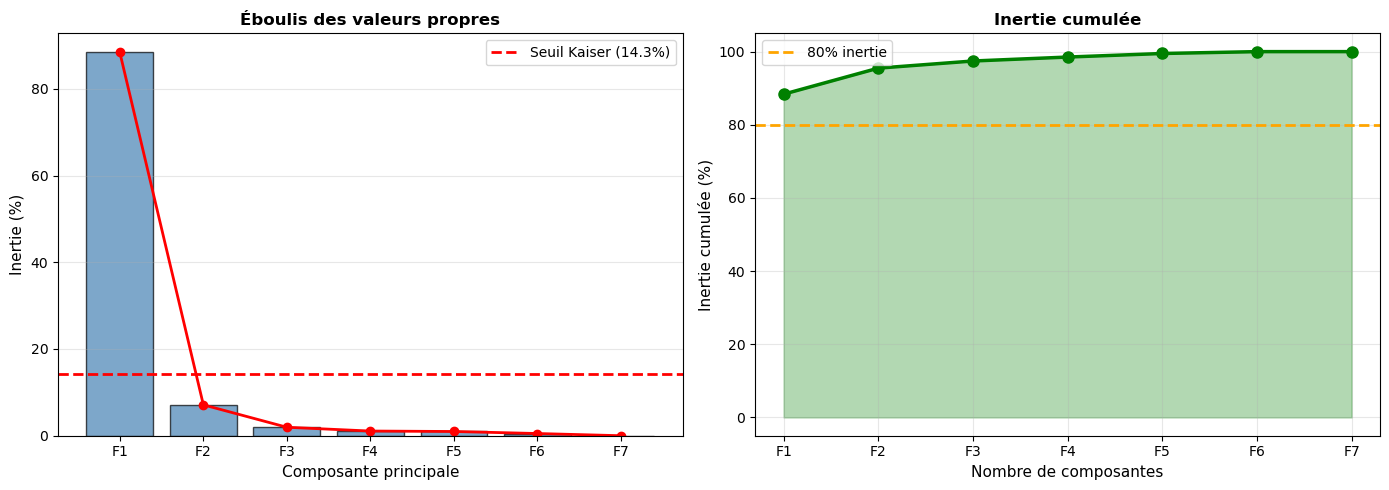


→ Avec 2 composantes : 95.48% de l'inertie
→ Avec 3 composantes : 97.44% de l'inertie


In [20]:
print("\n" + "="*70)
print("ÉTAPE 3 : CHOIX DU NOMBRE DE COMPOSANTES")
print("="*70)

print("\n--- Critère de Kaiser ---")
kaiser_threshold = 100 / len(quant_vars)
n_kaiser = sum(inertia_pct > kaiser_threshold)
print(f"Seuil de Kaiser : {kaiser_threshold:.2f}%")
print(f"Nombre de composantes > seuil : {n_kaiser}")
print(f"→ On garde les {n_kaiser} premières composantes selon Kaiser")

print("\n--- Critère du coude ---")
print("Observer le graphique : chercher où la décroissance ralentit")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Éboulis des valeurs propres
axes[0].bar(range(1, len(eigenvalues)+1), inertia_pct, alpha=0.7, 
            color='steelblue', edgecolor='black')
axes[0].plot(range(1, len(eigenvalues)+1), inertia_pct, 'ro-', linewidth=2)
axes[0].axhline(kaiser_threshold, color='red', linestyle='--', 
                linewidth=2, label=f'Seuil Kaiser ({kaiser_threshold:.1f}%)')
axes[0].set_xlabel('Composante principale', fontsize=11)
axes[0].set_ylabel('Inertie (%)', fontsize=11)
axes[0].set_title('Éboulis des valeurs propres', fontsize=12, fontweight='bold')
axes[0].set_xticks(range(1, len(eigenvalues)+1))
axes[0].set_xticklabels([f'F{i}' for i in range(1, len(eigenvalues)+1)])
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Inertie cumulée
axes[1].plot(range(1, len(eigenvalues)+1), inertia_cumsum, 'go-', 
             linewidth=2.5, markersize=8)
axes[1].axhline(80, color='orange', linestyle='--', linewidth=2, 
                label='80% inertie')
axes[1].fill_between(range(1, len(eigenvalues)+1), 0, inertia_cumsum, 
                      alpha=0.3, color='green')
axes[1].set_xlabel('Nombre de composantes', fontsize=11)
axes[1].set_ylabel('Inertie cumulée (%)', fontsize=11)
axes[1].set_title('Inertie cumulée', fontsize=12, fontweight='bold')
axes[1].set_xticks(range(1, len(eigenvalues)+1))
axes[1].set_xticklabels([f'F{i}' for i in range(1, len(eigenvalues)+1)])
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n→ Avec 2 composantes : {inertia_cumsum[1]:.2f}% de l'inertie")
print(f"→ Avec 3 composantes : {inertia_cumsum[2]:.2f}% de l'inertie")

# ÉTAPE 4 : CERCLE DES CORRÉLATIONS


ÉTAPE 4 : CERCLE DES CORRÉLATIONS

Le cercle des corrélations montre la relation entre :
- Les variables initiales
- Les composantes principales F1 et F2

--- Corrélations variables-composantes ---
(Projection des variables sur F1 et F2)
                      F1     F2
Engine_Size_L      0.904  0.374
Cylinders          0.876  0.449
Fuel_City_L100km   0.979 -0.133
Fuel_Hwy_L100km    0.943 -0.250
Fuel_Comb_L100km   0.977 -0.175
Fuel_Comb_mpg     -0.935  0.215
CO2_Emissions_gkm  0.961  0.005


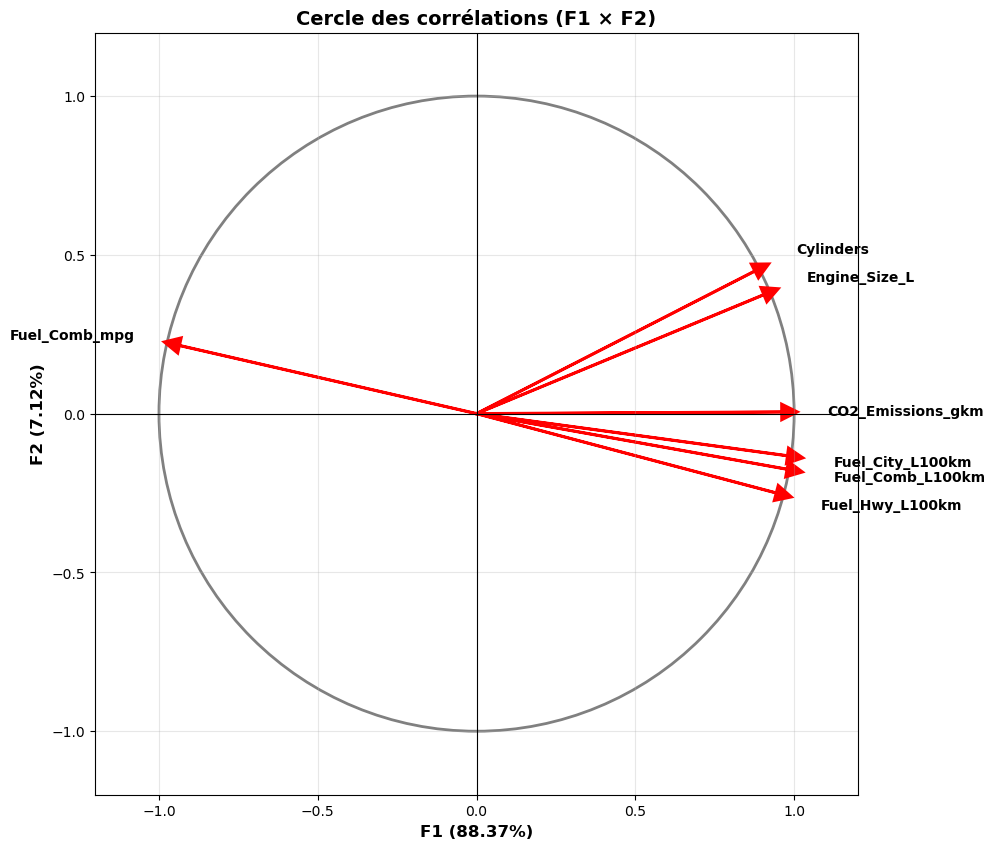


--- Interprétation du cercle ---
Variables proches de F1 (axe horizontal) :
Fuel_City_L100km     0.978745
Fuel_Comb_L100km     0.977490
CO2_Emissions_gkm    0.960614
Name: F1, dtype: float64

Variables proches de F2 (axe vertical) :
Cylinders          0.448919
Engine_Size_L      0.374496
Fuel_Hwy_L100km    0.249725
Name: F2, dtype: float64

Règles d'interprétation :
- Flèche longue = variable bien représentée
- Flèche courte = variable mal représentée
- Flèches dans même direction = variables corrélées
- Flèches opposées = variables anticorrélées
- Flèches perpendiculaires = variables non corrélées


In [21]:
print("\n" + "="*70)
print("ÉTAPE 4 : CERCLE DES CORRÉLATIONS")
print("="*70)

print("\nLe cercle des corrélations montre la relation entre :")
print("- Les variables initiales")
print("- Les composantes principales F1 et F2")

# Corrélations variables-composantes (loadings)
loadings = pca.components_.T * np.sqrt(eigenvalues)
loadings_df = pd.DataFrame(
    loadings[:, :2],
    columns=['F1', 'F2'],
    index=quant_vars
)

print("\n--- Corrélations variables-composantes ---")
print("(Projection des variables sur F1 et F2)")
print(loadings_df.round(3))

# Graphique cercle des corrélations
fig, ax = plt.subplots(figsize=(10, 10))

# Cercle
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linewidth=2)
ax.add_artist(circle)

# Axes
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)

# Flèches des variables
for i, var in enumerate(quant_vars):
    x, y = loadings[i, 0], loadings[i, 1]
    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, 
             fc='red', ec='red', linewidth=2)
    
    # Positionner le label
    offset = 0.15
    if abs(x) > abs(y):
        ha = 'left' if x > 0 else 'right'
        va = 'center'
    else:
        ha = 'center'
        va = 'bottom' if y > 0 else 'top'
    
    ax.text(x * (1 + offset), y * (1 + offset), var, 
            fontsize=10, ha=ha, va=va, fontweight='bold')

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel(f'F1 ({inertia_pct[0]:.2f}%)', fontsize=12, fontweight='bold')
ax.set_ylabel(f'F2 ({inertia_pct[1]:.2f}%)', fontsize=12, fontweight='bold')
ax.set_title('Cercle des corrélations (F1 × F2)', fontsize=14, fontweight='bold')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n--- Interprétation du cercle ---")
print("Variables proches de F1 (axe horizontal) :")
f1_vars = loadings_df.abs()['F1'].sort_values(ascending=False)
print(f1_vars.head(3))

print("\nVariables proches de F2 (axe vertical) :")
f2_vars = loadings_df.abs()['F2'].sort_values(ascending=False)
print(f2_vars.head(3))

print("\nRègles d'interprétation :")
print("- Flèche longue = variable bien représentée")
print("- Flèche courte = variable mal représentée")
print("- Flèches dans même direction = variables corrélées")
print("- Flèches opposées = variables anticorrélées")
print("- Flèches perpendiculaires = variables non corrélées")


# ÉTAPE 5 : CONTRIBUTIONS DES VARIABLES

In [22]:
print("\n" + "="*70)
print("ÉTAPE 5 : CONTRIBUTIONS DES VARIABLES AUX AXES")
print("="*70)

# Contributions (en %)
contributions = (pca.components_**2) * 100
contrib_df = pd.DataFrame(
    contributions[:2, :].T,
    columns=['Contrib F1 (%)', 'Contrib F2 (%)'],
    index=quant_vars
)

print("\n--- Contributions des variables ---")
print(contrib_df.round(2))

print("\nVariables contribuant le plus à F1 :")
print(contrib_df['Contrib F1 (%)'].sort_values(ascending=False).head(3))

print("\nVariables contribuant le plus à F2 :")
print(contrib_df['Contrib F2 (%)'].sort_values(ascending=False).head(3))



ÉTAPE 5 : CONTRIBUTIONS DES VARIABLES AUX AXES

--- Contributions des variables ---
                   Contrib F1 (%)  Contrib F2 (%)
Engine_Size_L               13.22           28.14
Cylinders                   12.41           40.43
Fuel_City_L100km            15.48            3.53
Fuel_Hwy_L100km             14.39           12.51
Fuel_Comb_L100km            15.44            6.15
Fuel_Comb_mpg               14.14            9.24
CO2_Emissions_gkm           14.92            0.01

Variables contribuant le plus à F1 :
Fuel_City_L100km     15.484163
Fuel_Comb_L100km     15.444492
CO2_Emissions_gkm    14.915820
Name: Contrib F1 (%), dtype: float64

Variables contribuant le plus à F2 :
Cylinders          40.433187
Engine_Size_L      28.138243
Fuel_Hwy_L100km    12.511976
Name: Contrib F2 (%), dtype: float64


# ÉTAPE 6 : PROJECTION DES INDIVIDUS


ÉTAPE 6 : PLAN FACTORIEL DES INDIVIDUS

Le plan factoriel projette les individus sur F1 et F2
→ Individus proches = profils similaires
→ Position sur F1/F2 = valeurs sur ces axes


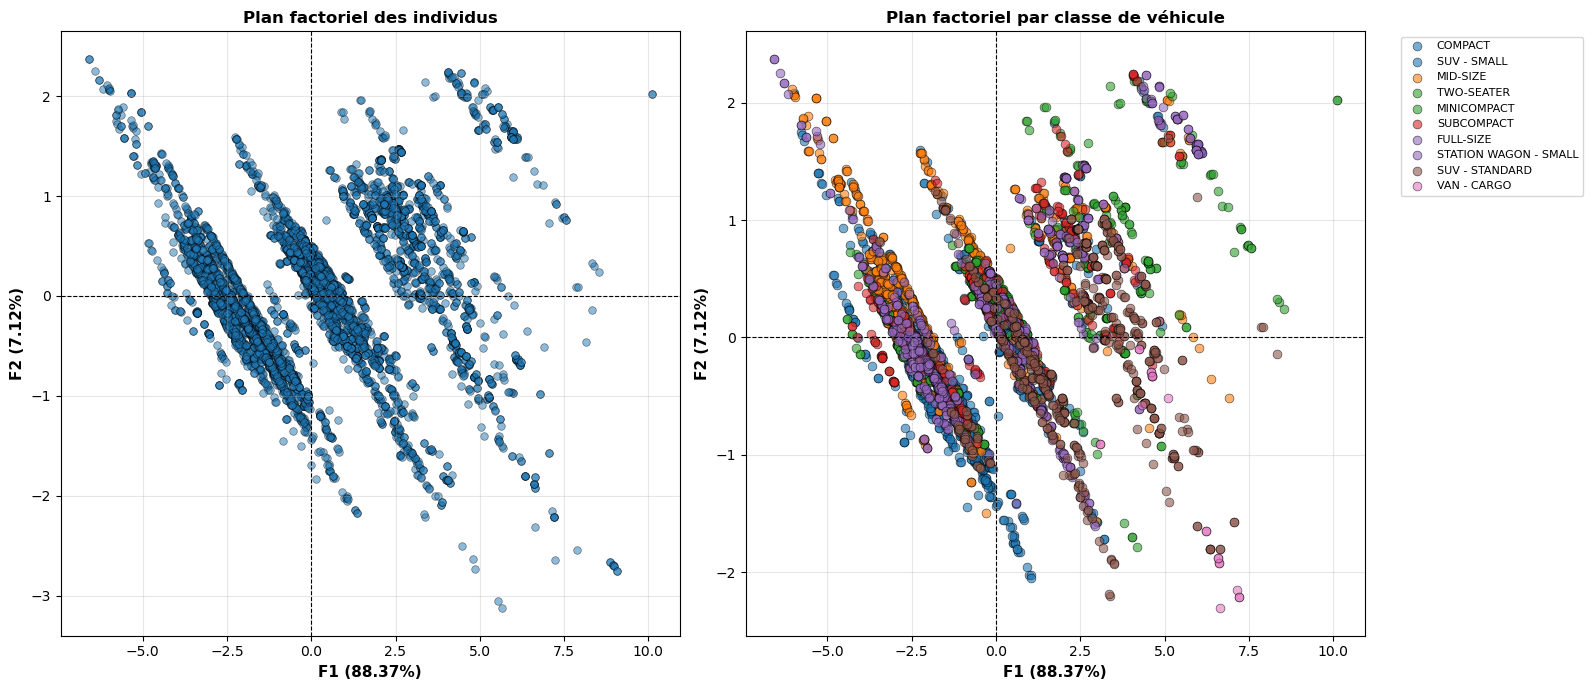

In [23]:
print("\n" + "="*70)
print("ÉTAPE 6 : PLAN FACTORIEL DES INDIVIDUS")
print("="*70)

print("\nLe plan factoriel projette les individus sur F1 et F2")
print("→ Individus proches = profils similaires")
print("→ Position sur F1/F2 = valeurs sur ces axes")

# Créer dataframe avec coordonnées
individus_pca = pd.DataFrame(
    X_pca[:, :2],
    columns=['F1', 'F2']
)

# Ajouter variable qualitative pour colorer
if 'Vehicle_Class' in data.columns:
    individus_pca['Vehicle_Class'] = data.loc[X.index, 'Vehicle_Class'].values

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Graphique 1 : Tous les individus
axes[0].scatter(individus_pca['F1'], individus_pca['F2'], 
                alpha=0.5, s=30, edgecolors='black', linewidth=0.5)
axes[0].axhline(0, color='black', linewidth=0.8, linestyle='--')
axes[0].axvline(0, color='black', linewidth=0.8, linestyle='--')
axes[0].set_xlabel(f'F1 ({inertia_pct[0]:.2f}%)', fontsize=11, fontweight='bold')
axes[0].set_ylabel(f'F2 ({inertia_pct[1]:.2f}%)', fontsize=11, fontweight='bold')
axes[0].set_title('Plan factoriel des individus', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Graphique 2 : Coloré par classe de véhicule
if 'Vehicle_Class' in individus_pca.columns:
    classes = individus_pca['Vehicle_Class'].unique()
    colors = plt.cm.tab10(np.linspace(0, 1, len(classes)))
    
    for i, classe in enumerate(classes[:10]):  # Limiter à 10 classes
        mask = individus_pca['Vehicle_Class'] == classe
        axes[1].scatter(individus_pca.loc[mask, 'F1'], 
                       individus_pca.loc[mask, 'F2'],
                       alpha=0.6, s=40, label=classe, 
                       color=colors[i], edgecolors='black', linewidth=0.5)
    
    axes[1].axhline(0, color='black', linewidth=0.8, linestyle='--')
    axes[1].axvline(0, color='black', linewidth=0.8, linestyle='--')
    axes[1].set_xlabel(f'F1 ({inertia_pct[0]:.2f}%)', fontsize=11, fontweight='bold')
    axes[1].set_ylabel(f'F2 ({inertia_pct[1]:.2f}%)', fontsize=11, fontweight='bold')
    axes[1].set_title('Plan factoriel par classe de véhicule', 
                     fontsize=12, fontweight='bold')
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ÉTAPE 7 : INTERPRÉTATION DES AXES

In [24]:
print("\n" + "="*70)
print("ÉTAPE 7 : INTERPRÉTATION DES COMPOSANTES PRINCIPALES")
print("="*70)

print("\n--- Composante F1 ---")
print(f"Inertie expliquée : {inertia_pct[0]:.2f}%")
print("\nVariables les plus corrélées à F1 :")
f1_interpretation = loadings_df.sort_values('F1', key=abs, ascending=False)
for var, corr in f1_interpretation['F1'].head(3).items():
    sens = "positive" if corr > 0 else "négative"
    print(f"  - {var} : {corr:.3f} (corrélation {sens})")

print("\n--- Composante F2 ---")
print(f"Inertie expliquée : {inertia_pct[1]:.2f}%")
print("\nVariables les plus corrélées à F2 :")
f2_interpretation = loadings_df.sort_values('F2', key=abs, ascending=False)
for var, corr in f2_interpretation['F2'].head(3).items():
    sens = "positive" if corr > 0 else "négative"
    print(f"  - {var} : {corr:.3f} (corrélation {sens})")


ÉTAPE 7 : INTERPRÉTATION DES COMPOSANTES PRINCIPALES

--- Composante F1 ---
Inertie expliquée : 88.37%

Variables les plus corrélées à F1 :
  - Fuel_City_L100km : 0.979 (corrélation positive)
  - Fuel_Comb_L100km : 0.977 (corrélation positive)
  - CO2_Emissions_gkm : 0.961 (corrélation positive)

--- Composante F2 ---
Inertie expliquée : 7.12%

Variables les plus corrélées à F2 :
  - Cylinders : 0.449 (corrélation positive)
  - Engine_Size_L : 0.374 (corrélation positive)
  - Fuel_Hwy_L100km : -0.250 (corrélation négative)


# ÉTAPE 8 : BIPLOT (Cercle + Individus combinés)


ÉTAPE 8 : BIPLOT (VARIABLES + INDIVIDUS)


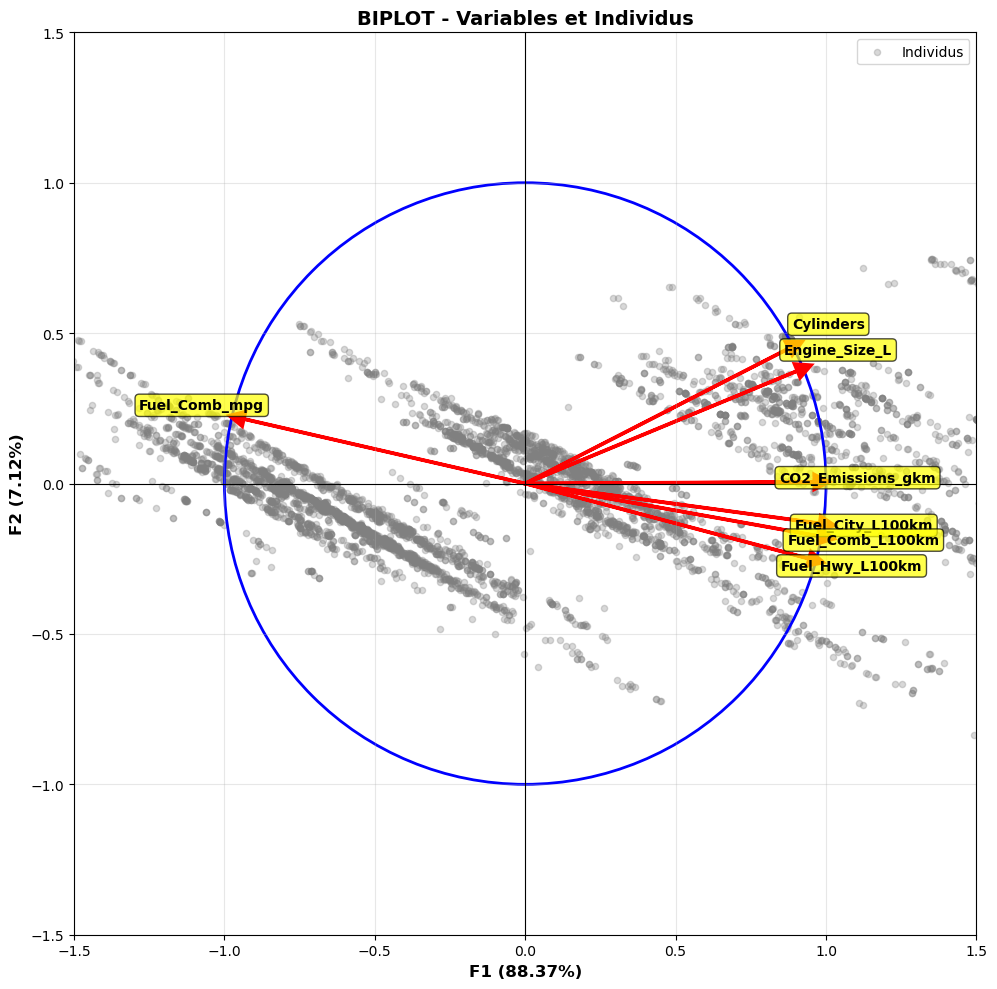


Le biplot permet de voir simultanément :
- La position des individus
- La direction des variables
→ Les individus dans la direction d'une variable ont des valeurs élevées


In [25]:
print("\n" + "="*70)
print("ÉTAPE 8 : BIPLOT (VARIABLES + INDIVIDUS)")
print("="*70)

fig, ax = plt.subplots(figsize=(12, 10))

# Échelle pour les individus
scale_factor = 3
individus_scaled = X_pca[:, :2] / scale_factor

# Individus
ax.scatter(individus_scaled[:, 0], individus_scaled[:, 1], 
          alpha=0.3, s=20, color='gray', label='Individus')

# Cercle
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linewidth=2)
ax.add_artist(circle)

# Axes
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)

# Flèches des variables
for i, var in enumerate(quant_vars):
    x, y = loadings[i, 0], loadings[i, 1]
    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, 
             fc='red', ec='red', linewidth=2.5)
    
    offset = 0.15
    ax.text(x * (1 + offset), y * (1 + offset), var, 
            fontsize=10, ha='center', fontweight='bold', 
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel(f'F1 ({inertia_pct[0]:.2f}%)', fontsize=12, fontweight='bold')
ax.set_ylabel(f'F2 ({inertia_pct[1]:.2f}%)', fontsize=12, fontweight='bold')
ax.set_title('BIPLOT - Variables et Individus', fontsize=14, fontweight='bold')
ax.legend()
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nLe biplot permet de voir simultanément :")
print("- La position des individus")
print("- La direction des variables")
print("→ Les individus dans la direction d'une variable ont des valeurs élevées")

# RÉSUMÉ FINAL

In [26]:
print("\n" + "="*70)
print("RÉSUMÉ DE L'ACP")
print("="*70)

print(f"\n✓ Variables analysées : {len(quant_vars)}")
print(f"✓ Individus analysés : {len(X)}")
print(f"✓ Composantes principales : {n_components}")
print(f"✓ Inertie F1+F2 : {inertia_cumsum[1]:.2f}%")
print(f"✓ Critère Kaiser : {n_kaiser} composantes")

print("\n" + "="*70)
print("ANALYSE ACP TERMINÉE")
print("="*70)


RÉSUMÉ DE L'ACP

✓ Variables analysées : 7
✓ Individus analysés : 6282
✓ Composantes principales : 7
✓ Inertie F1+F2 : 95.48%
✓ Critère Kaiser : 1 composantes

ANALYSE ACP TERMINÉE
